### Import Library

In [254]:
# import library for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import library for machine learning
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

### Load Dataset

In [255]:
# import data train
df_train = pd.read_csv('train.csv')
df_train.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0    842302         M        17.99         10.38          122.80     1001.0  \
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean concavity_mean concave points_mean  ...   
0          0.11840           0.27760         0.3001              0.1471  ...  \
1          0.08474           0.07864         0.0869             0.07017  ...   
2          0.10960           0.15990         0.1974              0.1279  ...   
3          0.14250           0.28390         0.2414              0.1052  ...   
4          0.10030           0.13280          0.198              0.1043  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst   
0         25.38          17.33           184.60      2019.0            0.1622  \
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst symmetry_worst   
0             0.6656           0.7119                0.2654         0.4601  \
1             0.1866           0.2416                 0.186         0.2750   
2             0.4245           0.4504                 0.243         0.3613   
3             0.8663           0.6869                0.2575         0.6638   
4             0.2050              0.4                0.1625         0.2364   

  fractal_dimension_worst  
0                 0.11890  
1                 0.08902  
2                 0.08758  
3                 0.17300  
4                 0.07678  

[5 rows x 32 columns]

In [256]:
# import data test
df_test = pd.read_csv('test.csv')
df_test.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean   
0  911320501       11.600         18.36           73.88      412.7  \
1  911320502       13.170         18.22           84.28      537.3   
2    9113239       13.240         20.13           86.87      542.9   
3    9113455       13.140         20.74           85.98      536.9   
4    9113514        9.668         18.10           61.06      286.3   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.08508           0.05855         0.03367             0.017770  \
1          0.07466           0.05994         0.04859             0.028700   
2          0.08284           0.12230         0.10100             0.028330   
3          0.08675           0.10890         0.10850             0.035100   
4          0.08311           0.05428         0.01479             0.005769   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0         0.1516  ...         12.77          24.02            82.68  \
1         0.1454  ...         14.90          23.89            95.10   
2         0.1601  ...         15.44          25.50           115.00   
3         0.1562  ...         14.80          25.46           100.90   
4         0.1680  ...         11.15          24.62            71.11   

   area_worst  smoothness_worst  compactness_worst  concavity_worst   
0       495.1            0.1342             0.1808          0.18600  \
1       687.6            0.1282             0.1965          0.18760   
2       733.5            0.1201             0.5646          0.65560   
3       689.1            0.1351             0.3549          0.45040   
4       380.2            0.1388             0.1255          0.06409   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.08288          0.3210                  0.07863  
1               0.10450          0.2235                  0.06925  
2               0.13570          0.2845                  0.12490  
3               0.11810          0.2563                  0.08174  
4               0.02500          0.3057                  0.07875  

[5 rows x 31 columns]

In [257]:
# drop id column
df = df_train.drop(['id'], axis=1)

### EDA (Exploratory Data Analysis)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    object 
 8   concave points_mean      463 non-null    object 
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

In [259]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean   
count    463.000000    463.000000      463.000000   463.000000  \
mean     236.667337     19.515745       92.786393   666.295032   
std     4224.020741      8.978351       24.392039   356.167006   
min        8.196000      9.710000       43.790000   143.500000   
25%       11.800000     16.070000       75.485000   427.950000   
50%       13.480000     18.770000       86.910000   559.200000   
75%       16.150000     21.680000      106.450000   804.100000   
max    90000.000000    190.000000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  symmetry_mean   
count       463.000000        463.000000     463.000000  \
mean          0.096341          0.104633       0.182116   
std           0.013692          0.053844       0.028023   
min           0.062510          0.019380       0.116700   
25%           0.086580          0.064130       0.162100   
50%           0.096100          0.092180       0.180000   
75%           0.105350          0.130550       0.196500   
max           0.144700          0.345400       0.304000   

       fractal_dimension_mean   radius_se  texture_se  ...  symmetry_se   
count              463.000000  463.000000  463.000000  ...   463.000000  \
mean                 0.062562    0.415091    1.206298  ...     0.020868   
std                  0.006973    0.287562    0.531970  ...     0.008671   
min                  0.049960    0.111500    0.360200  ...     0.007882   
25%                  0.057585    0.235850    0.829300  ...     0.015170   
50%                  0.061300    0.330500    1.081000  ...     0.018840   
75%                  0.065815    0.503800    1.474500  ...     0.023765   
max                  0.097440    2.873000    4.885000  ...     0.078950   

       fractal_dimension_se  radius_worst  texture_worst  perimeter_worst   
count            463.000000    463.000000     463.000000       463.000000  \
mean               0.003789     16.472354      25.579503       108.584384   
std                0.002753      4.900876       6.145821        34.002042   
min                0.000895      7.930000      12.020000        50.410000   
25%                0.002201     13.060000      20.940000        84.480000   
50%                0.003118     15.030000      25.260000        98.270000   
75%                0.004484     19.515000      29.615000       128.900000   
max                0.029840     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  symmetry_worst   
count   463.000000        463.000000         463.000000      463.000000  \
mean    903.777538          0.132454           0.256777        0.293355   
std     583.850860          0.022941           0.161901        0.064266   
min     185.200000          0.071170           0.027290        0.156500   
25%     519.300000          0.116600           0.144950        0.252600   
50%     698.700000          0.131400           0.211900        0.284100   
75%    1170.000000          0.146350           0.343700        0.320400   
max    4254.000000          0.222600           1.058000        0.663800   

       fractal_dimension_worst  
count               463.000000  
mean                  0.083819  
std                   0.018354  
min                   0.055040  
25%                   0.071250  
50%                   0.079930  
75%                   0.092095  
max                   0.207500  

[8 rows x 24 columns]

In [260]:
# cek atribut yang memiliki nilai "?" dan menggantinya dengan NaN
df.columns[df.isin(["?"]).any()]
df = df.replace('?',np.nan)

In [261]:
# cek jumlah NaN pada setiap atribut
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [262]:
# drop atribut yang memiliki nilai NaN
df = df.dropna()
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [263]:
# mengubah atribut bertipe object menjadi numerik
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['diagnosis'])
df[object_columns] = df[object_columns].apply(lambda x: x.astype('float'))

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                456 non-null    object 
 1   radius_mean              456 non-null    float64
 2   texture_mean             456 non-null    float64
 3   perimeter_mean           456 non-null    float64
 4   area_mean                456 non-null    float64
 5   smoothness_mean          456 non-null    float64
 6   compactness_mean         456 non-null    float64
 7   concavity_mean           456 non-null    float64
 8   concave points_mean      456 non-null    float64
 9   symmetry_mean            456 non-null    float64
 10  fractal_dimension_mean   456 non-null    float64
 11  radius_se                456 non-null    float64
 12  texture_se               456 non-null    float64
 13  perimeter_se             456 non-null    float64
 14  area_se                  456 no

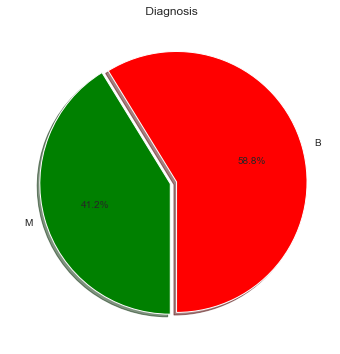

In [265]:
# pie chart
labels = df['diagnosis'].value_counts(sort = True).index
sizes = df['diagnosis'].value_counts(sort = True)

colors = ["red","green"]
explode = (0.05,0)  # explode 1st slice

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title(' Diagnosis')
plt.show()

Dataset terdiri dari 2 klasifikasi yaitu:
- M (Malignant)
- B (Benign)

<Axes: >

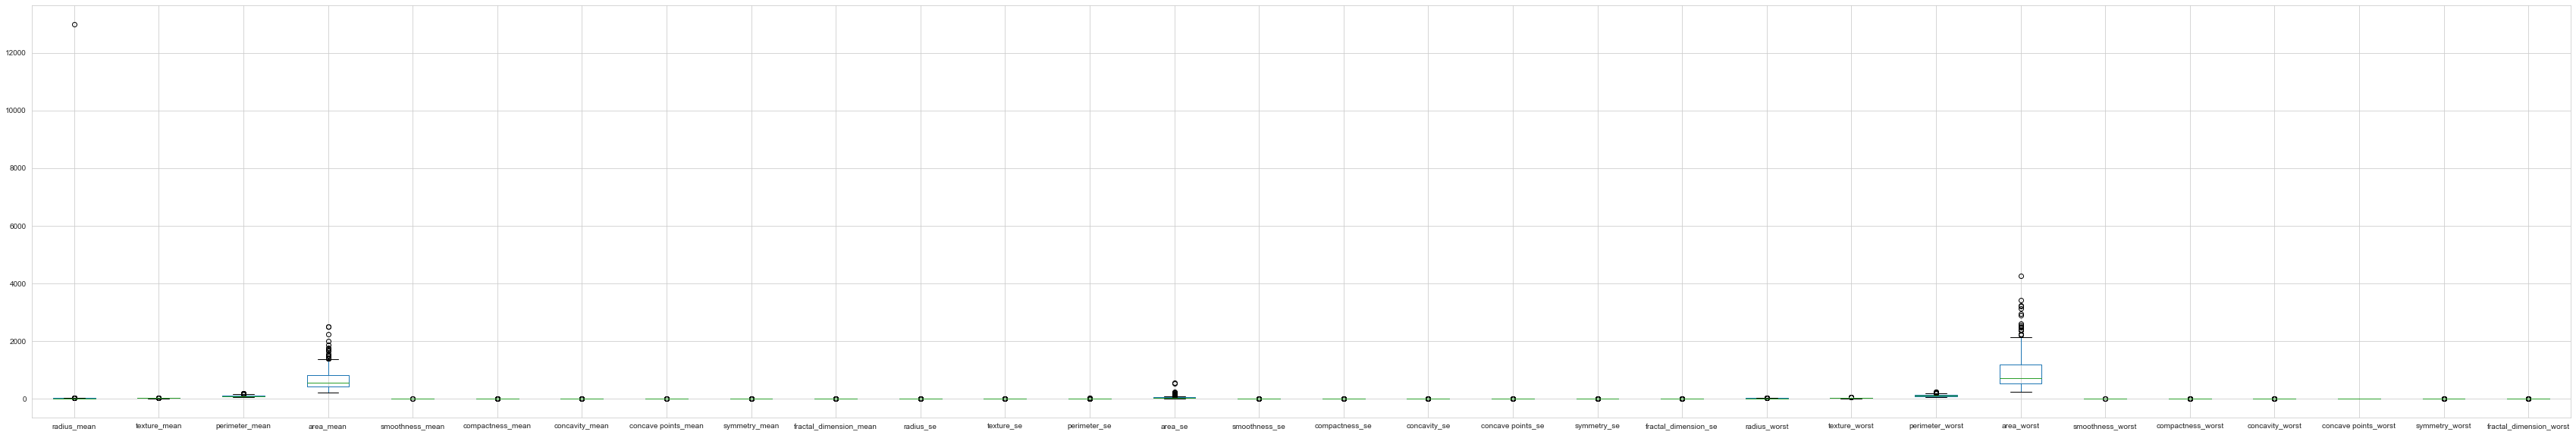

In [266]:
# boxplot untuk melihat persebaran data
df.boxplot(figsize=(60,10))

Terdapat data yang nilai nya terlalu tinggi pada fitur radius_mean dan area_worst

In [267]:
# mengatasi outlier
df = df.drop(df[df['radius_mean'] > 1000].index)
df = df.drop(df[df['area_worst'] > 3000].index)

Untuk mengatasi hal tersebut makan akan di drop baris yang memilki nilai tersebut

Text(0.5, 1.0, 'diagnosis vs texture_worst')

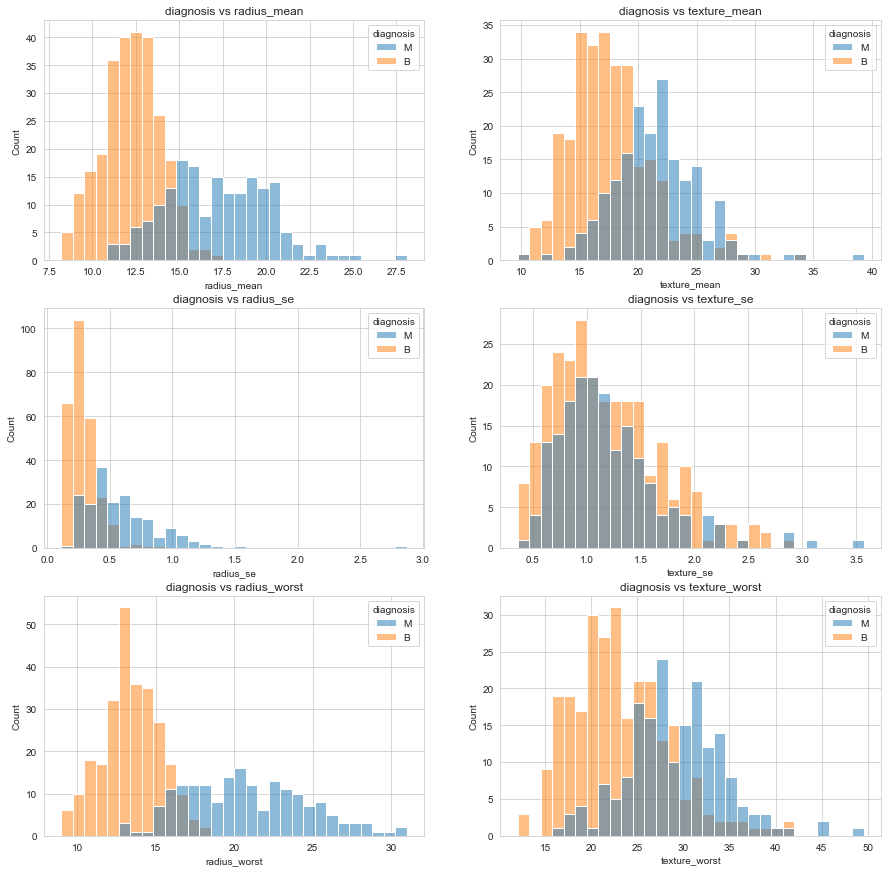

In [268]:
# radius vs texture
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df, x='radius_mean', bins=30, hue="diagnosis", ax=ax[0, 0]).set_title("diagnosis vs radius_mean")
sns.histplot(df, x='texture_mean', bins=30, hue="diagnosis", ax=ax[0, 1]).set_title("diagnosis vs texture_mean")
sns.histplot(df, x='radius_se', bins=30, hue="diagnosis", ax=ax[1, 0]).set_title("diagnosis vs radius_se")
sns.histplot(df, x='texture_se', bins=30, hue="diagnosis", ax=ax[1, 1]).set_title("diagnosis vs texture_se")
sns.histplot(df, x='radius_worst', bins=30, hue="diagnosis", ax=ax[2, 0]).set_title("diagnosis vs radius_worst")
sns.histplot(df, x='texture_worst', bins=30, hue="diagnosis", ax=ax[2, 1]).set_title("diagnosis vs texture_worst")

- Data yang terdiagnosis Maignant(M) memiliki radius dan texture lebih tinggi dibanding Benign(B)
- Kanker tipe B memiliki rata-rata radius antara 10 - 15 sedangkan tipe M rata-ratanya adalah 17 - 20

Text(0.5, 1.0, 'diagnosis vs area_worst')

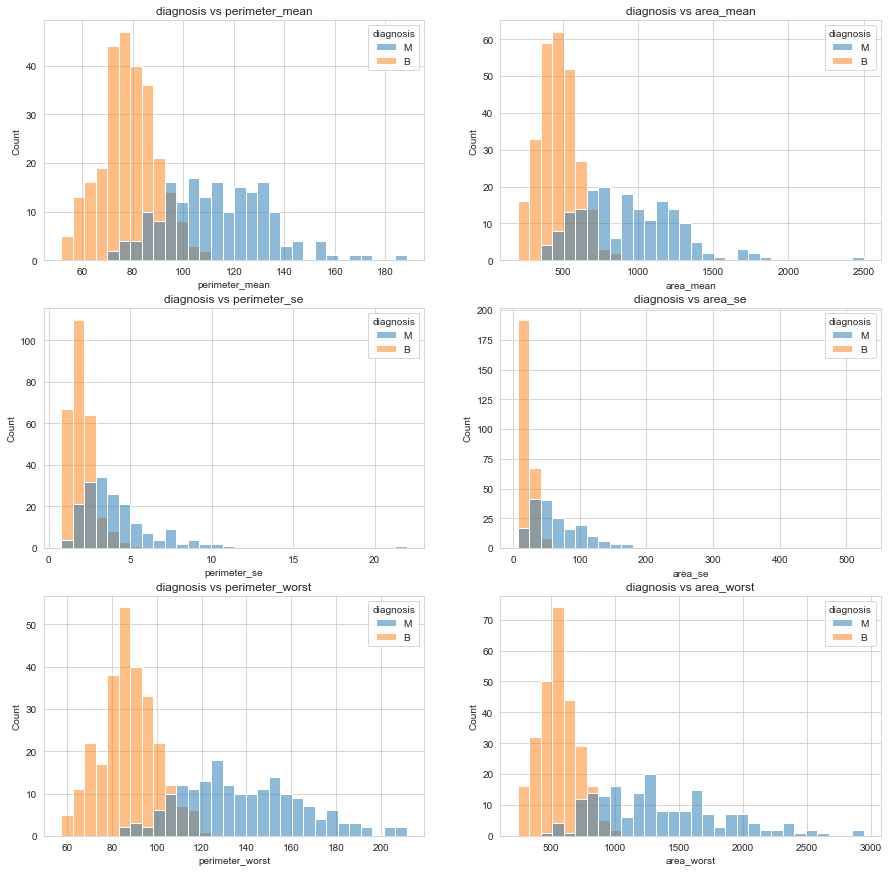

In [269]:
# perimeter vs area
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df, x='perimeter_mean', bins=30, hue="diagnosis", ax=ax[0, 0]).set_title("diagnosis vs perimeter_mean")
sns.histplot(df, x='area_mean', bins=30, hue="diagnosis", ax=ax[0, 1]).set_title("diagnosis vs area_mean")
sns.histplot(df, x='perimeter_se', bins=30, hue="diagnosis", ax=ax[1, 0]).set_title("diagnosis vs perimeter_se")
sns.histplot(df, x='area_se', bins=30, hue="diagnosis", ax=ax[1, 1]).set_title("diagnosis vs area_se")
sns.histplot(df, x='perimeter_worst', bins=30, hue="diagnosis", ax=ax[2, 0]).set_title("diagnosis vs perimeter_worst")
sns.histplot(df, x='area_worst', bins=30, hue="diagnosis", ax=ax[2, 1]).set_title("diagnosis vs area_worst")


- Untuk kanker Tipe M memiliki nilai luas dan keliling yang lebih tinggi dibanding Tipe B.
- Rata-rata keliling tipe B antara 70 - 80 dan tipe M antara 100 - 140.
- Rata-rata luas area tipe B bernilai sekitar 500 dan tipe M adalah sekitar 1000.

Text(0.5, 1.0, 'diagnosis vs compactness_worst')

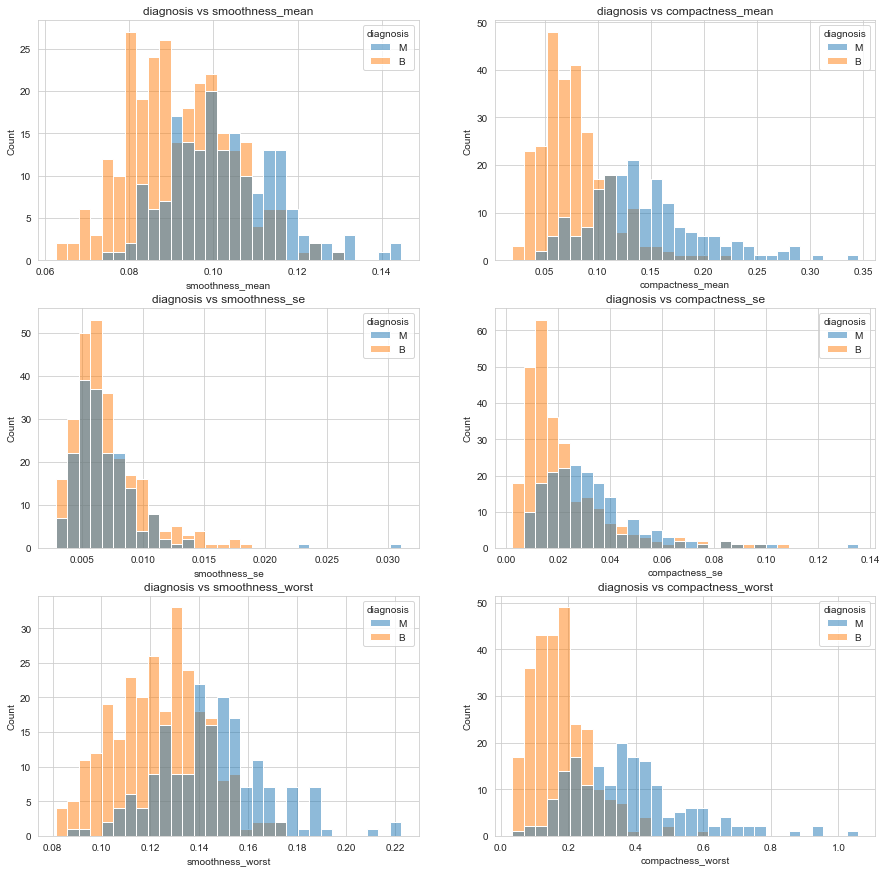

In [270]:
# smoothness vs compactness
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df, x='smoothness_mean', bins=30, hue="diagnosis", ax=ax[0, 0]).set_title("diagnosis vs smoothness_mean")
sns.histplot(df, x='compactness_mean', bins=30, hue="diagnosis", ax=ax[0, 1]).set_title("diagnosis vs compactness_mean")
sns.histplot(df, x='smoothness_se', bins=30, hue="diagnosis", ax=ax[1, 0]).set_title("diagnosis vs smoothness_se")
sns.histplot(df, x='compactness_se', bins=30, hue="diagnosis", ax=ax[1, 1]).set_title("diagnosis vs compactness_se")
sns.histplot(df, x='smoothness_worst', bins=30, hue="diagnosis", ax=ax[2, 0]).set_title("diagnosis vs smoothness_worst")
sns.histplot(df, x='compactness_worst', bins=30, hue="diagnosis", ax=ax[2, 1]).set_title("diagnosis vs compactness_worst")

- Rata-rata smoothness untuk kedua tipe hampir sama meskipun nilai Tipe M lebih besar.
- Untuk compactness, Tipe M masih memiliki nilai yang lebih tinggi dibanding Tipe B

Text(0.5, 1.0, 'diagnosis vs concave points_worst')

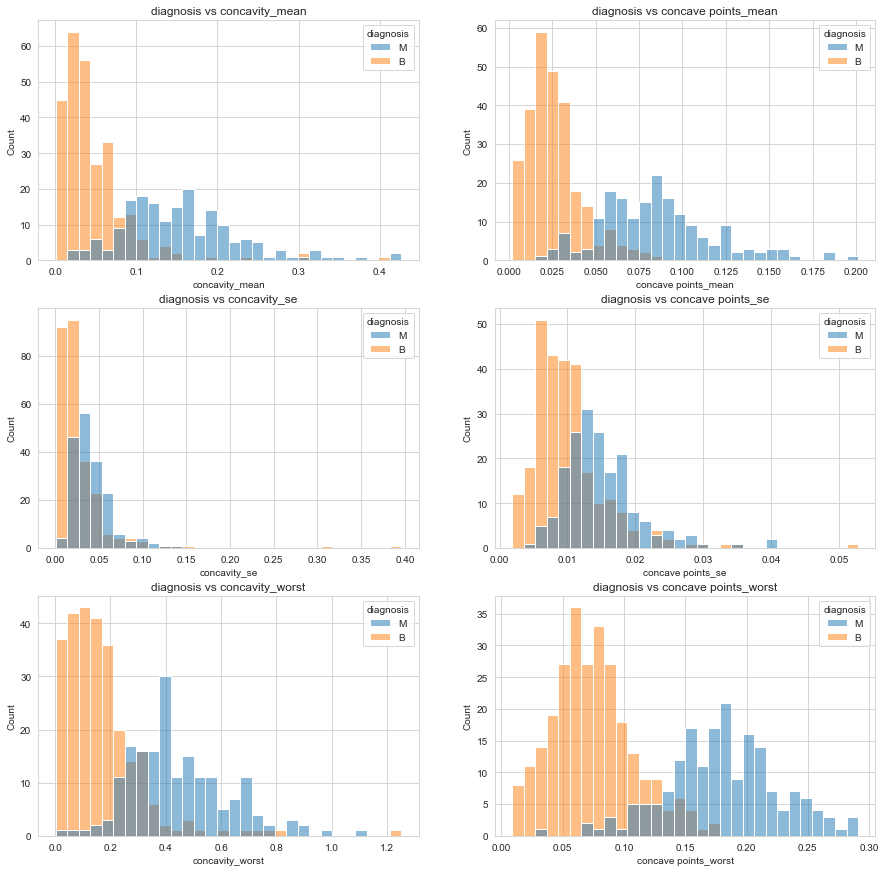

In [271]:
# concavity vs concave points
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df, x='concavity_mean', bins=30, hue="diagnosis", ax=ax[0, 0]).set_title("diagnosis vs concavity_mean")
sns.histplot(df, x='concave points_mean', bins=30, hue="diagnosis", ax=ax[0, 1]).set_title("diagnosis vs concave points_mean")
sns.histplot(df, x='concavity_se', bins=30, hue="diagnosis", ax=ax[1, 0]).set_title("diagnosis vs concavity_se")
sns.histplot(df, x='concave points_se', bins=30, hue="diagnosis", ax=ax[1, 1]).set_title("diagnosis vs concave points_se")
sns.histplot(df, x='concavity_worst', bins=30, hue="diagnosis", ax=ax[2, 0]).set_title("diagnosis vs concavity_worst")
sns.histplot(df, x='concave points_worst', bins=30, hue="diagnosis", ax=ax[2, 1]).set_title("diagnosis vs concave points_worst")

- Nilai rata-rata untuk concavity dan concave_point masih lebih tinggi tipe M dibanding tipe B.

Text(0.5, 1.0, 'diagnosis vs fractal_dimension_worst')

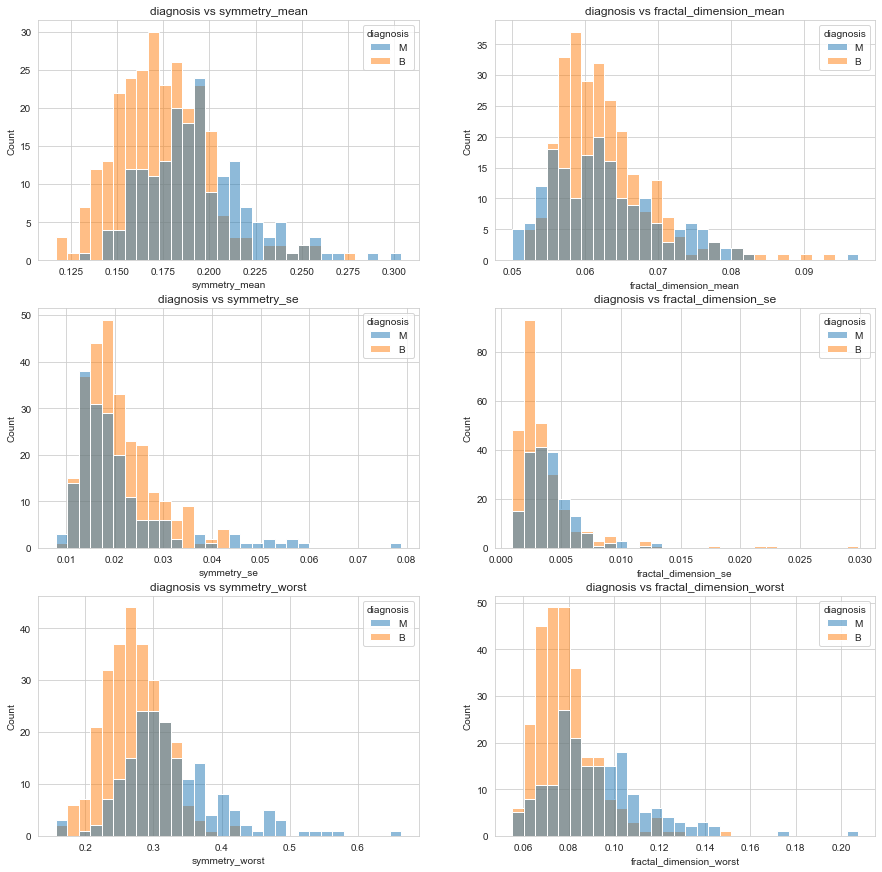

In [272]:
# symmetry vs fractal dimension
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df, x='symmetry_mean', bins=30, hue="diagnosis", ax=ax[0, 0]).set_title("diagnosis vs symmetry_mean")
sns.histplot(df, x='fractal_dimension_mean', bins=30, hue="diagnosis", ax=ax[0, 1]).set_title("diagnosis vs fractal_dimension_mean")
sns.histplot(df, x='symmetry_se', bins=30, hue="diagnosis", ax=ax[1, 0]).set_title("diagnosis vs symmetry_se")
sns.histplot(df, x='fractal_dimension_se', bins=30, hue="diagnosis", ax=ax[1, 1]).set_title("diagnosis vs fractal_dimension_se")
sns.histplot(df, x='symmetry_worst', bins=30, hue="diagnosis", ax=ax[2, 0]).set_title("diagnosis vs symmetry_worst")
sns.histplot(df, x='fractal_dimension_worst', bins=30, hue="diagnosis", ax=ax[2, 1]).set_title("diagnosis vs fractal_dimension_worst")

Terdapat nilai fractal_dimension untuk tipe B yang lebih tinggi dibanding tipe M

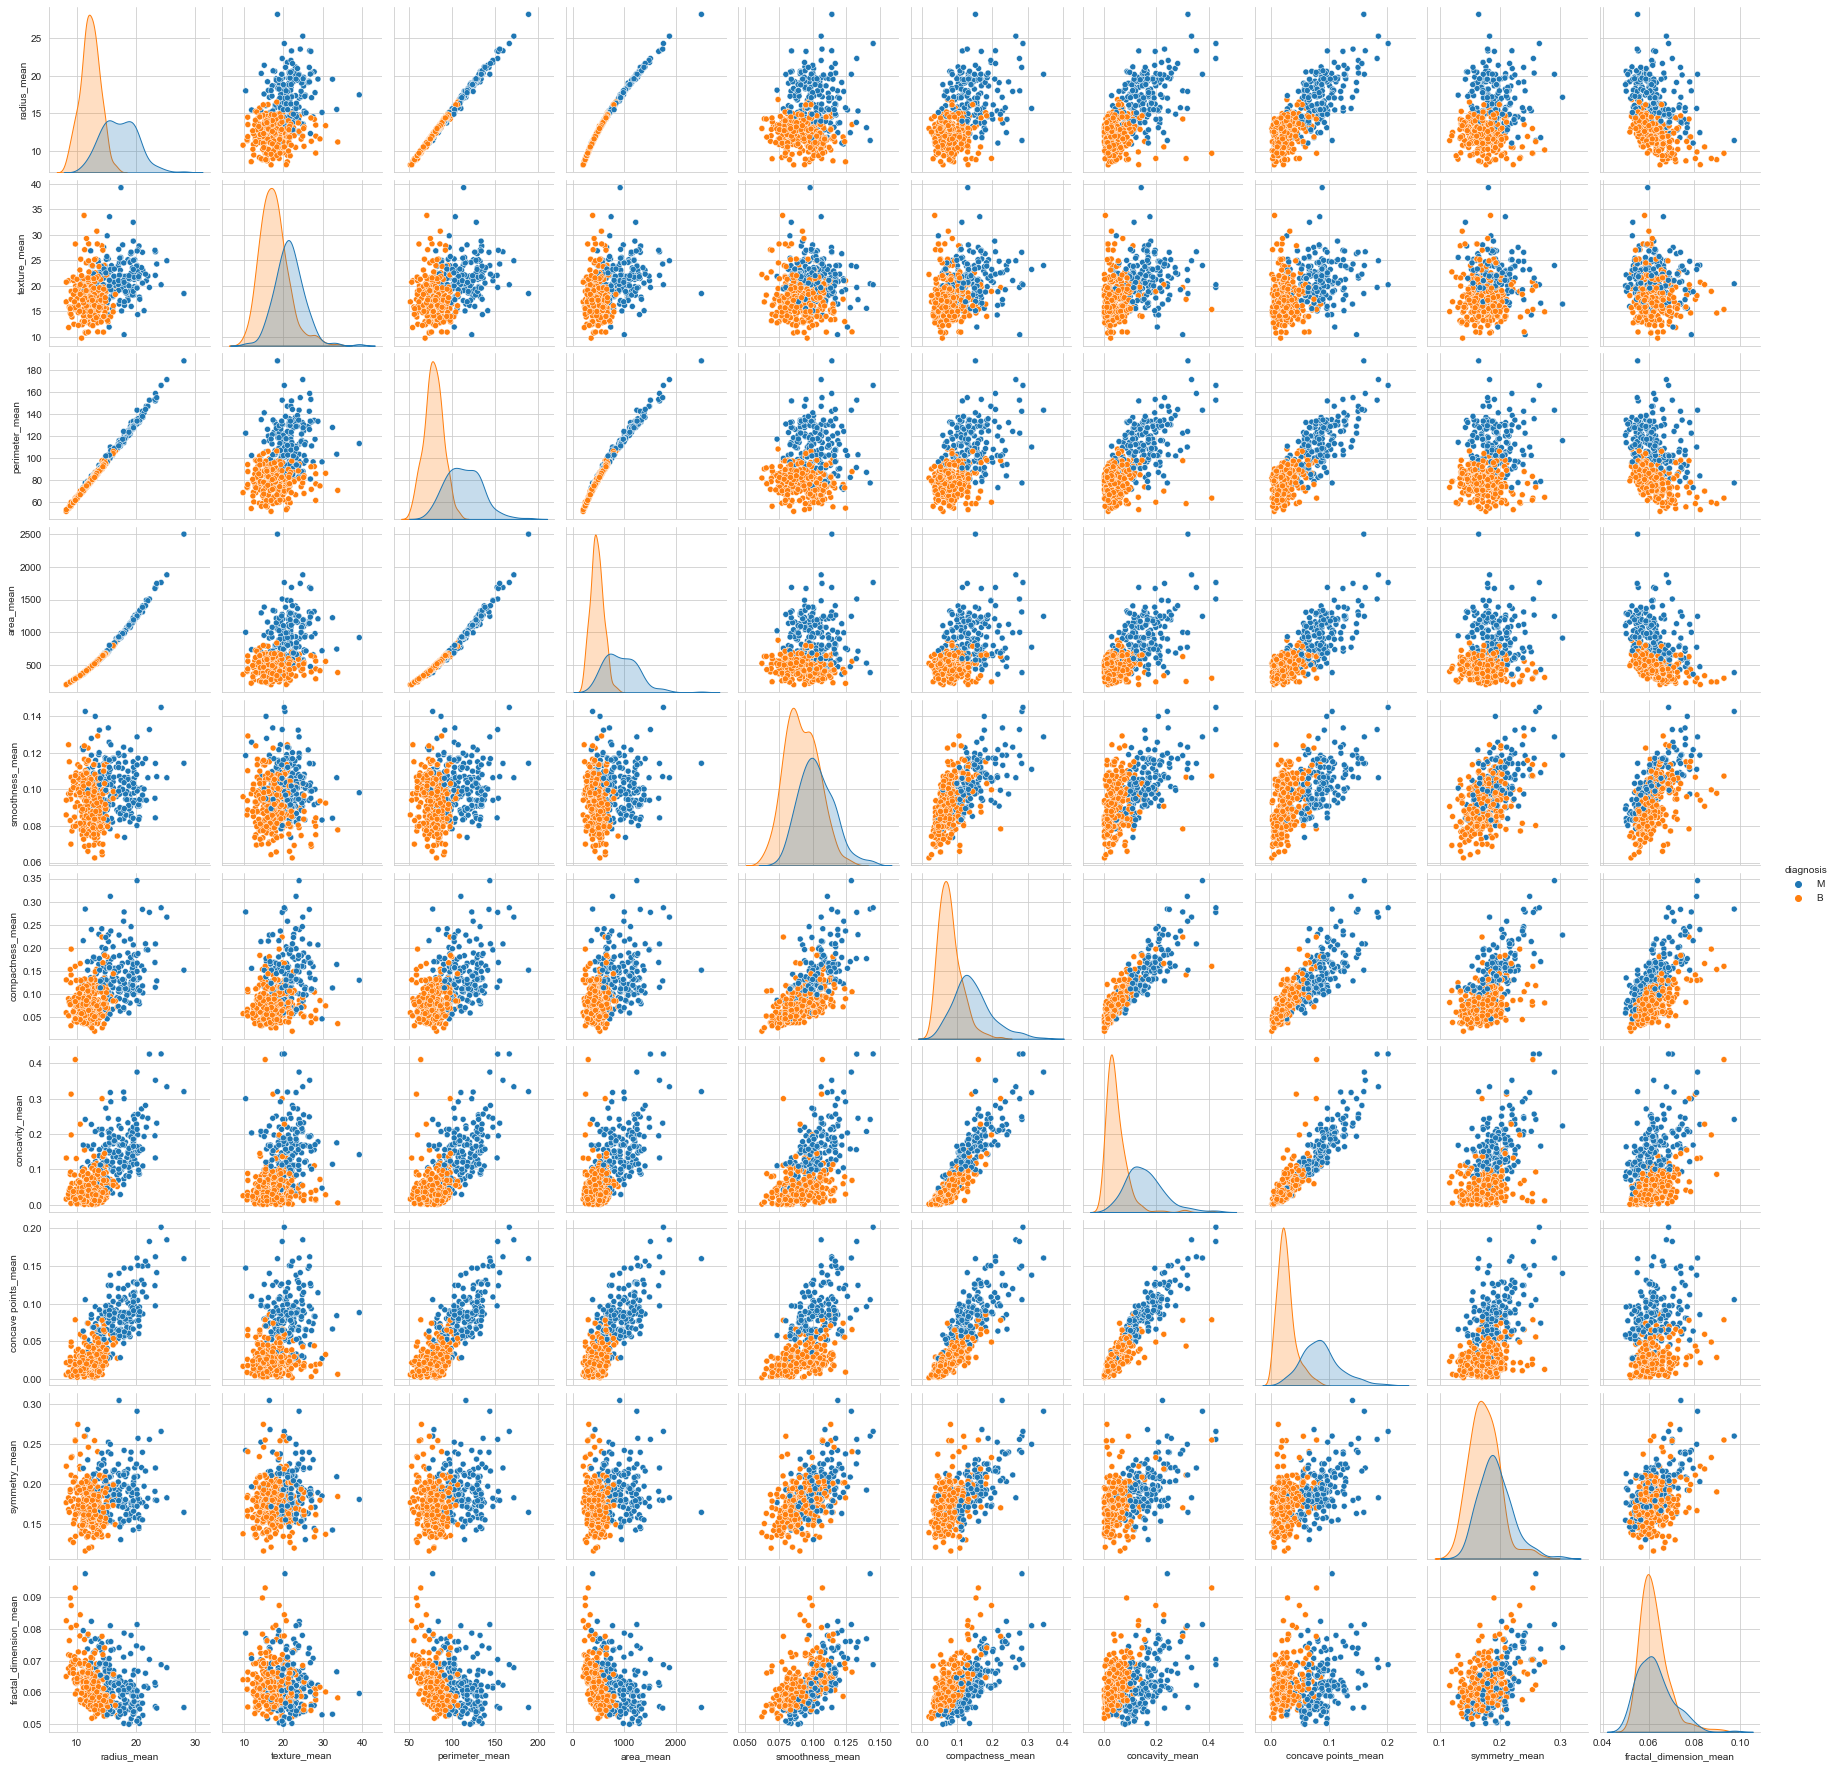

In [273]:
# pairplot of mean features
sns.pairplot(df, hue="diagnosis", vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

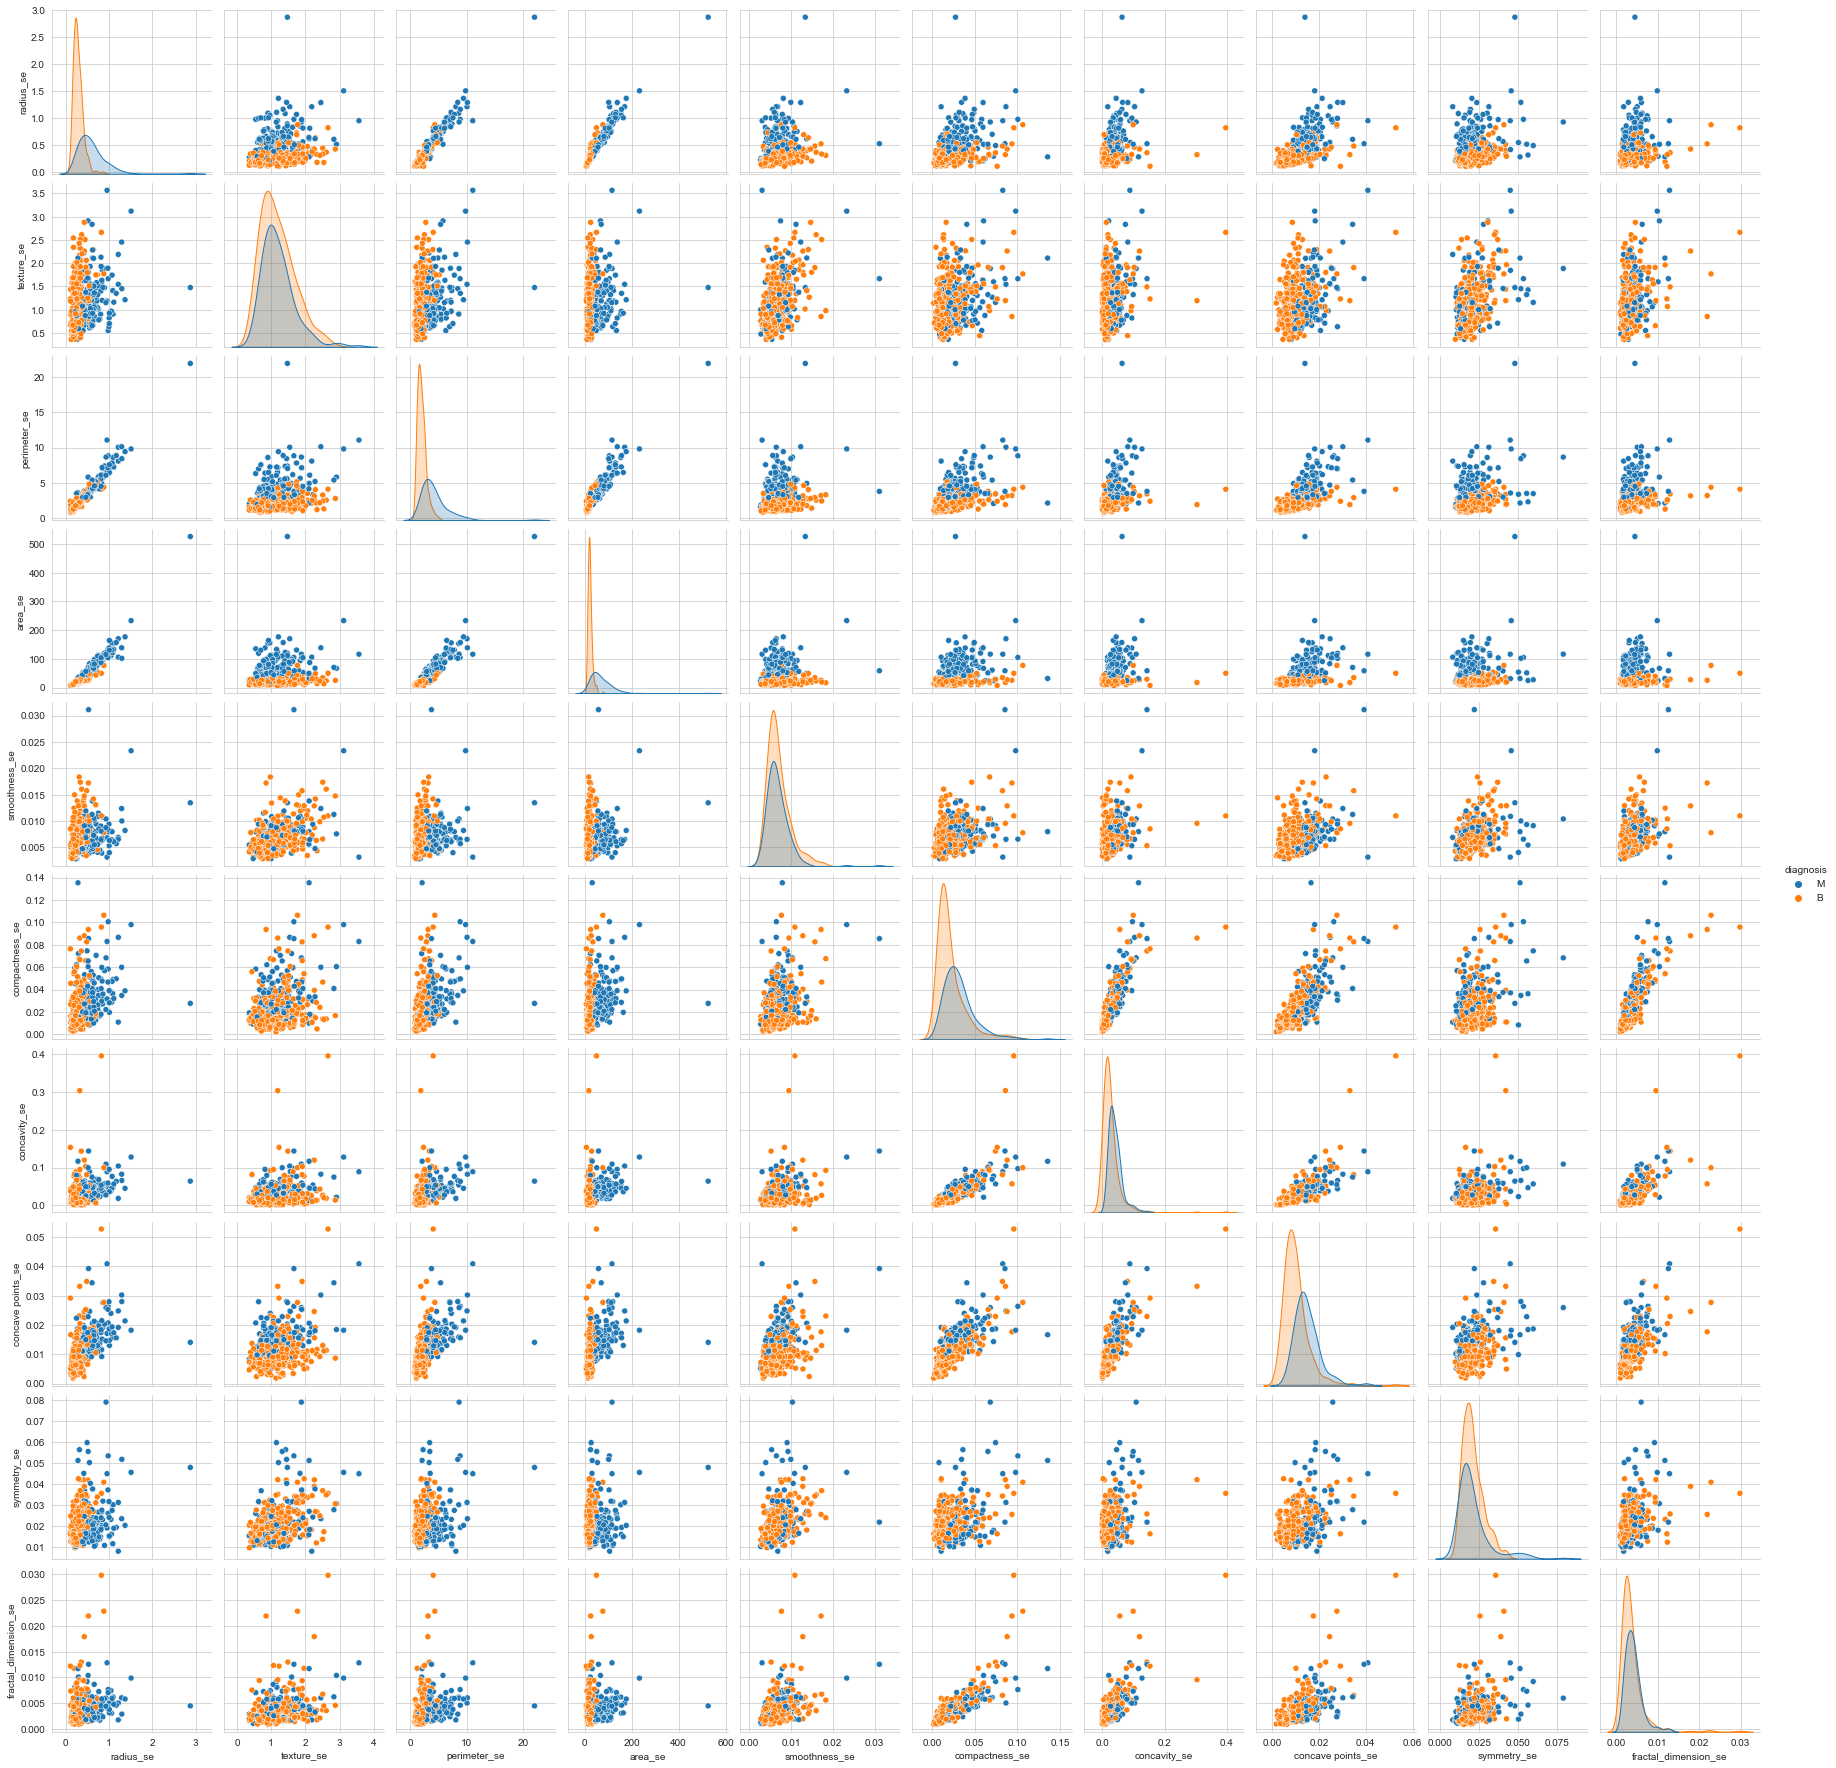

In [274]:
# pairplot of se features
sns.pairplot(df, hue="diagnosis", vars=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'])

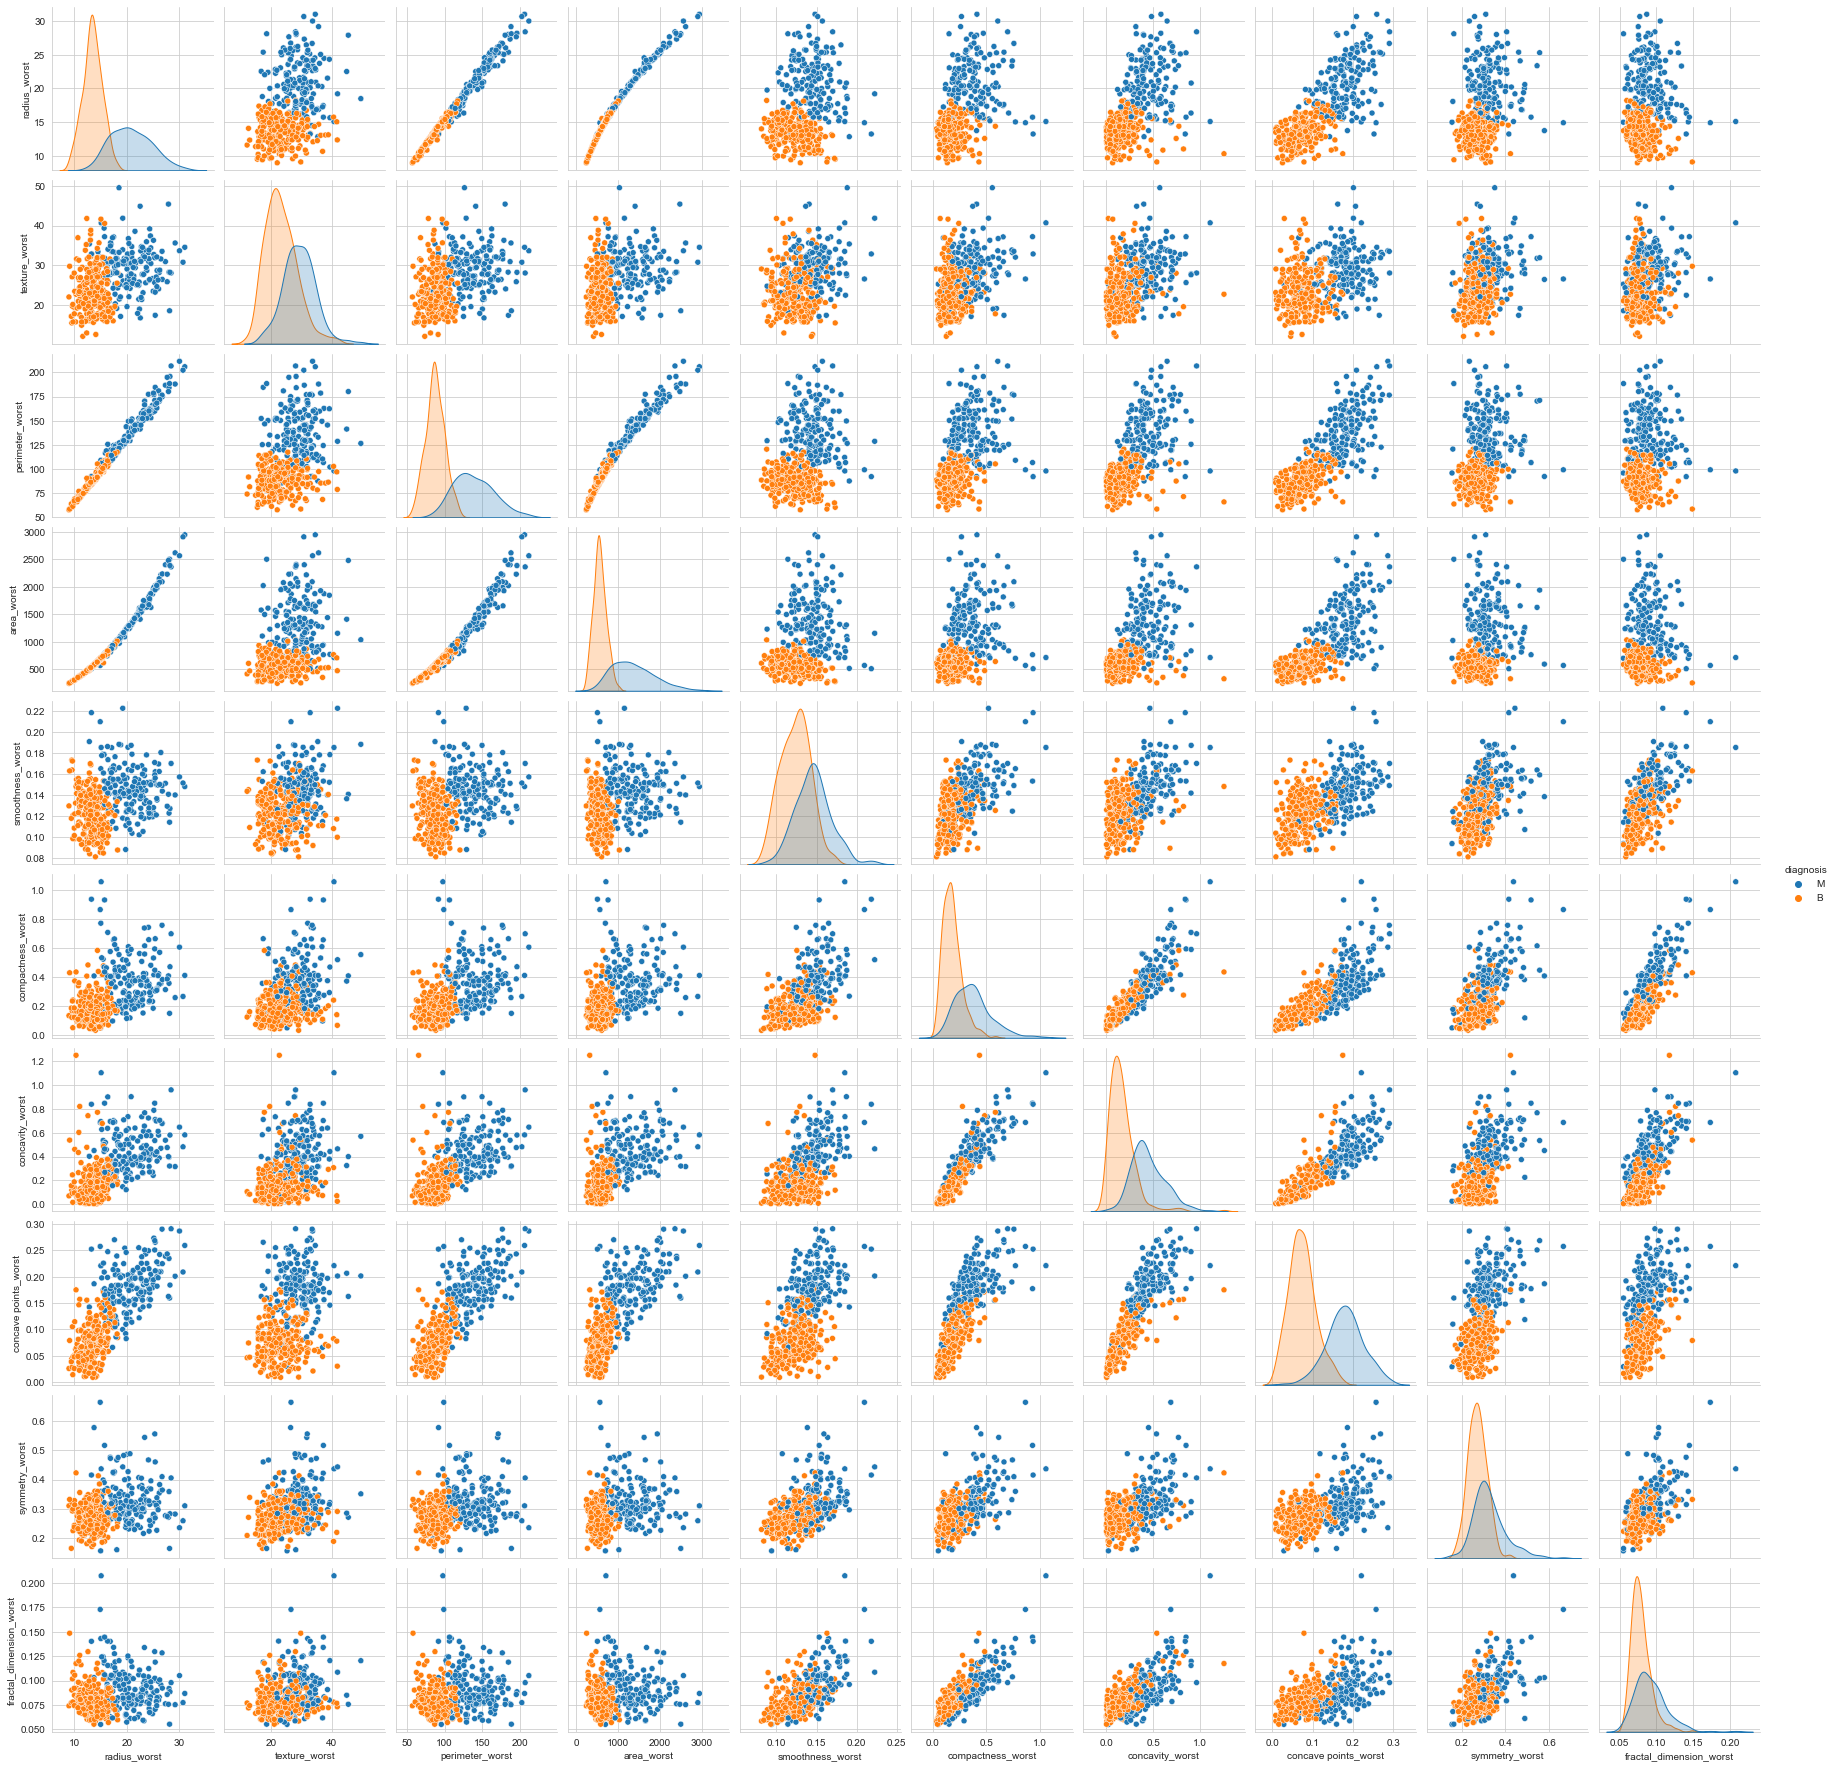

In [275]:
# pairplot of worst features
sns.pairplot(df, hue="diagnosis", vars=['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

Kesimpulan :
- Semakin tinggi nilai fitur tersebut maka semakin tinggi probabilitas terkena kanker tipe M
- Jumlah dari kanker tipe B lebih tinggi dibanding tipe M.

In [276]:
# ubah diagnosis menjadi label 1 dan 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

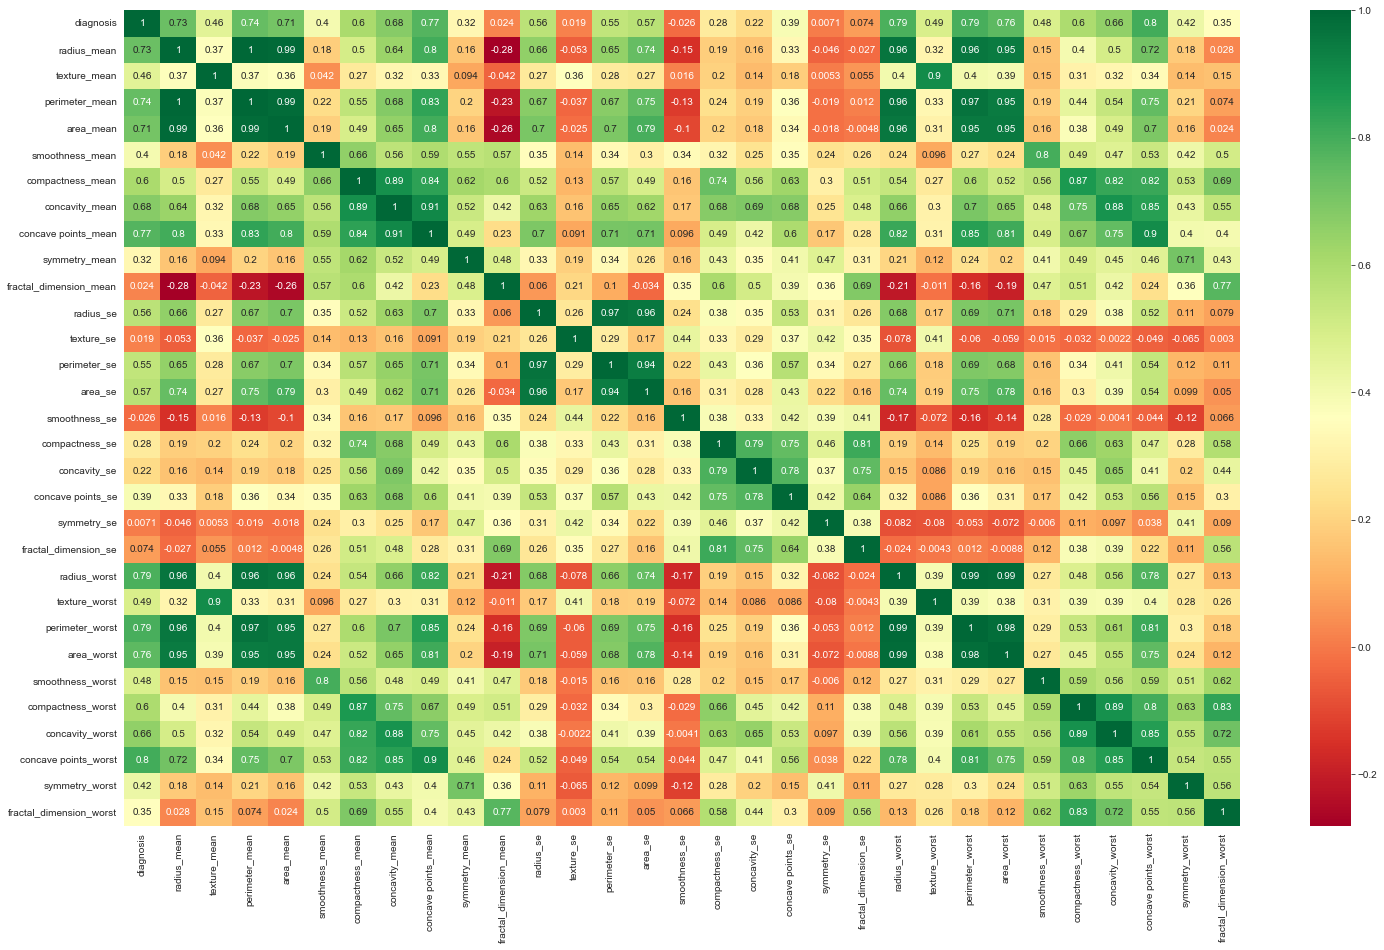

In [277]:
# cek korelasi
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(25,15))
g=sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [278]:
# membuat data X dan y
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [279]:
# melakukan scaling dan PCA
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled = pca.fit_transform(X_scaled)

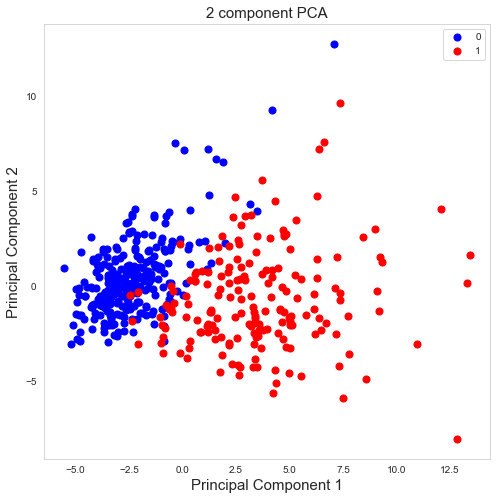

In [280]:
# plot hasil PCA
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 15)
targets = [0, 1]
colors = ['blue', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(X_scaled[indicesToKeep, 0]
               , X_scaled[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [281]:
# split data dengan ratio 70:30 dan random state 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Eksperimen & Evaluasi

#### TPOT With MLP

In [295]:
# membuat model MLP dengan TPOT
tpot_MLP = TPOTClassifier(generations=10, population_size=30, verbosity=2, template='MLPClassifier', cv=5, scoring='accuracy')
tpot_MLP.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.965079365079365

Generation 2 - Current best internal CV score: 0.965079365079365

Generation 3 - Current best internal CV score: 0.965079365079365

Generation 4 - Current best internal CV score: 0.965079365079365

Generation 5 - Current best internal CV score: 0.965079365079365

Generation 6 - Current best internal CV score: 0.965079365079365

Generation 7 - Current best internal CV score: 0.965079365079365

Generation 8 - Current best internal CV score: 0.965079365079365

Generation 9 - Current best internal CV score: 0.965079365079365

Generation 10 - Current best internal CV score: 0.965079365079365

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)


TPOTClassifier(generations=10, population_size=30, scoring='accuracy',
               template='MLPClassifier', verbosity=2)

In [296]:
# melakukan prediksi dengan data x_test
y_pred = tpot_MLP.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9407407407407408


#### Evaluasi MLP

Text(34.0, 0.5, 'Original Class')

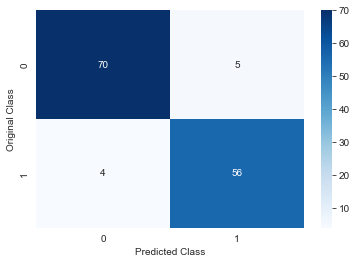

In [284]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [285]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.92      0.93      0.93        60

    accuracy                           0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



In [286]:
# save to csv
df_test.to_csv('Prediksi_MLP.csv', index=False)

#### TPOT With Random Forest

In [287]:
# membuat model Random Forest dengan TPOT
tpot_RandomForest = TPOTClassifier(generations=10, population_size=30, verbosity=2, template='RandomForestClassifier', cv=5, scoring='accuracy')
tpot_RandomForest.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9523809523809523

Generation 2 - Current best internal CV score: 0.9523809523809523

Generation 3 - Current best internal CV score: 0.9523809523809523

Generation 4 - Current best internal CV score: 0.9523809523809523

Generation 5 - Current best internal CV score: 0.9523809523809523

Generation 6 - Current best internal CV score: 0.9523809523809523

Generation 7 - Current best internal CV score: 0.9555555555555555

Generation 8 - Current best internal CV score: 0.9555555555555555

Generation 9 - Current best internal CV score: 0.9555555555555555

Generation 10 - Current best internal CV score: 0.9555555555555555

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=10, population_size=30, scoring='accuracy',
               template='RandomForestClassifier', verbosity=2)

In [288]:
# melakukan prediksi dengan data test
y_pred = tpot_RandomForest.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


#### Evaluasi Random Forest

Text(34.0, 0.5, 'Original Class')

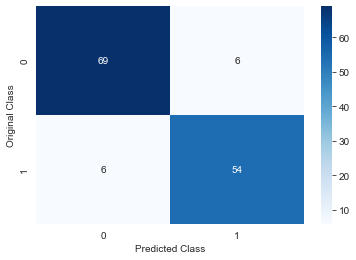

In [289]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [290]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        75
           1       0.90      0.90      0.90        60

    accuracy                           0.91       135
   macro avg       0.91      0.91      0.91       135
weighted avg       0.91      0.91      0.91       135



### Testing

In [292]:
df_test = df_test.drop(['id'], axis=1)
df_test_MLP = df_test.copy()
df_test_RandomForest = df_test.copy()

In [293]:
df_test_scaled = x_scaler.transform(df_test)
df_test_scaled = pca.transform(df_test_scaled)
test_pred_MLP = tpot_MLP.predict(df_test_scaled)
test_pred_RandomForest = tpot_RandomForest.predict(df_test_scaled)

df_test_MLP['diagnosis'] = test_pred_MLP
df_test_MLP['diagnosis'] = df_test_MLP['diagnosis'].map({1: 'M', 0: 'B'})
df_test_RandomForest['diagnosis'] = test_pred_RandomForest
df_test_RandomForest['diagnosis'] = df_test_RandomForest['diagnosis'].map({1: 'M', 0: 'B'})

In [294]:
df_test_MLP.to_csv('Prediksi_MLP.csv', index=False)
df_test_RandomForest.to_csv('Prediksi_RandomForest.csv', index=False)